## References

1. [How to Create Any Image Using Only Sine Functions | 2D Fourier Transform in Python](https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/)
2. numpy: https://numpy.org/doc/stable/reference/routines.fft.html

# Visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

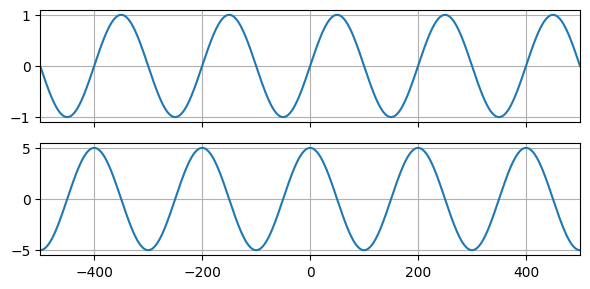

In [20]:
#plt.figure(figsize=(6, 2))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3), sharex=True)

x = np.arange(-500, 501, 1)
amplitude = 1.0
wavelength = 200.0
offset = 0
y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)

ax1.plot(x, y)
ax1.grid()
#ax1.xlim(np.min(x), np.max(x))

x = np.arange(-500, 501, 1)
amplitude = 5.0
wavelength = 200.0
offset = np.pi / 2
y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)

ax2.plot(x, y)
ax2.grid()

ax2.set_xlim(np.min(x), np.max(x))

plt.tight_layout()
plt.show()

In [21]:
x.shape

(1001,)

Shape of first grating: (1001, 1001)


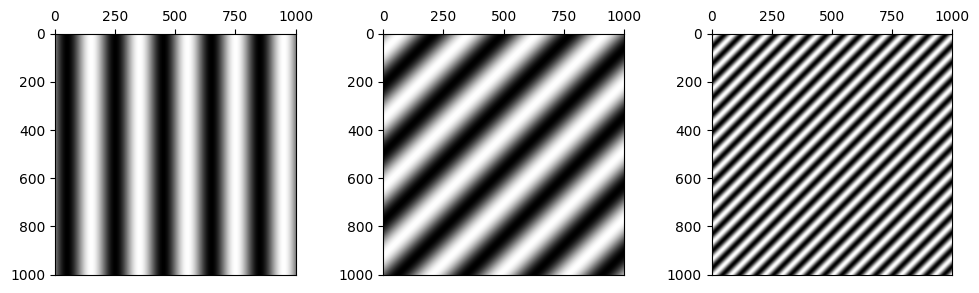

In [108]:
plt.figure(figsize=(10, 3))

#############
# GRATING 1 #
#############
_x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(_x, _x)
grating = 1.0 * np.sin((2 * np.pi * X / 200) + (0*np.pi))
print(f'Shape of first grating: {X.shape}')

plt.subplot(131)
plt.imshow(grating, cmap='gray')
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

#############
# GRATING 2 #
#############
width = 1001
height = 1001
wavelength = 200
angle = np.deg2rad(45)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
grating = np.sin(
    2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
)

plt.subplot(132)
plt.imshow(grating, cmap='gray')
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)


#############
# GRATING 3 #
#############
width = 1001
height = 1001
wavelength = 50
angle = np.deg2rad(45)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
grating = np.sin(
    2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
)

plt.subplot(133)
plt.imshow(grating, cmap='gray')
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)


plt.tight_layout()
plt.show()

# 1D FT

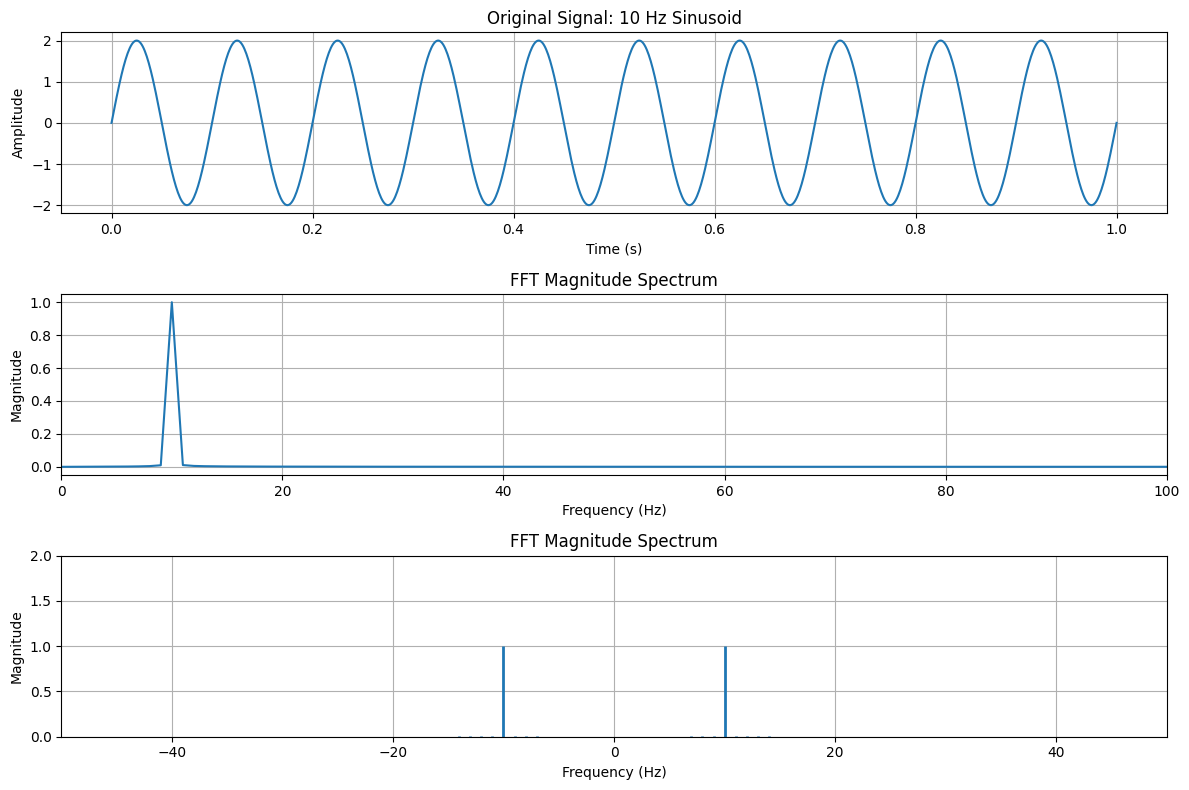

In [162]:
"""
The code generates a 10 Hz sinusoid and computes its FFT.

We create a 1-second signal sampled at 1000 Hz (sample_rate).
The signal is a pure sine wave at 10 Hz.
"""
# Signal parameters.
duration = 1.0  # Duration of signal in seconds.
sample_rate = 1000  # Number of samples per second.
freq = 10  # Frequency of our sinusoid in Hz.

# Generate time array.
t = np.linspace(0, duration, int(sample_rate * duration))

# Create a `freq` Hz sine wave.
signal = 2 * np.sin(2 * np.pi * freq * t)

# Compute the FFT.
# fft returns complex numbers, so we take the absolute value to get magnitudes.
fft_result = np.fft.fft(signal)
fft_magnitude = np.abs(fft_result)

# Get the corresponding frequencies for plotting
# fftfreq returns the frequencies corresponding to the FFT bins
frequencies = np.fft.fftfreq(len(t), 1/sample_rate)

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title(f'Original Signal: {freq} Hz Sinusoid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT magnitude spectrum
# We'll only show the positive frequencies up to sample_rate/2 (Nyquist frequency)
plt.subplot(3, 1, 2)
# Only plot the positive frequencies (up to len(frequencies)//2)
positive_freq_mask = frequencies >= 0
plt.plot(frequencies[positive_freq_mask], fft_magnitude[positive_freq_mask]/t.size)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 100)  # Limit x-axis to better see the peak


# Plot the FFT magnitude spectrum using stem
plt.subplot(3, 1, 3)
plt.vlines(
    frequencies, 
    ymin=0, 
    ymax=fft_magnitude/t.size,
    linewidth=2,
)

plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-50, 50)
plt.ylim(0, 2)

# Adjust layout and display
plt.tight_layout()
plt.show()

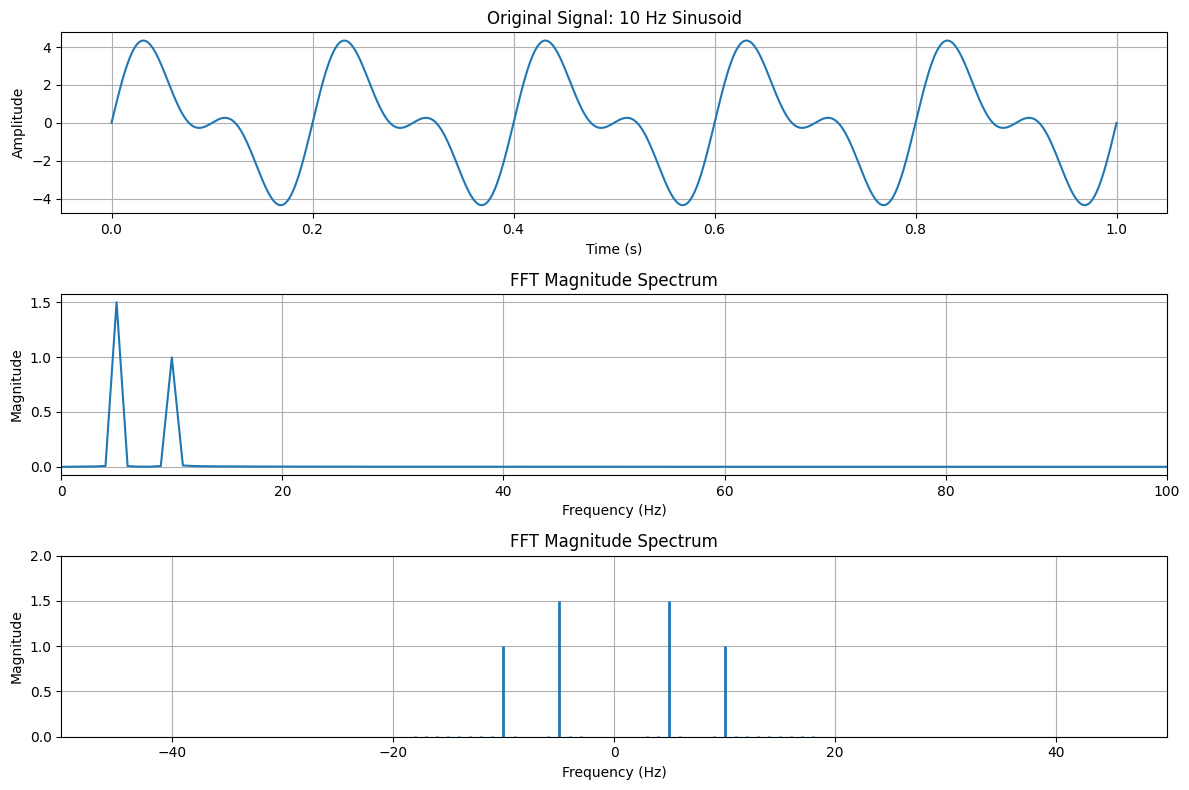

In [165]:
"""
The code generates a 10 Hz sinusoid and computes its FFT.

We create a 1-second signal sampled at 1000 Hz (sample_rate).
The signal is a pure sine wave at 10 Hz.
"""
# Signal parameters.
duration = 1.0  # Duration of signal in seconds.
sample_rate = 1000  # Number of samples per second.
freq = 10  # Frequency of our sinusoid in Hz.

# Generate time array.
t = np.linspace(0, duration, int(sample_rate * duration))

# Create a `freq` Hz sine wave.
signal = 2 * np.sin(2 * np.pi * freq * t) + 3 * np.sin(2 * np.pi * 5 * t)

# Compute the FFT.
# fft returns complex numbers, so we take the absolute value to get magnitudes.
fft_result = np.fft.fft(signal)
fft_magnitude = np.abs(fft_result)

# Get the corresponding frequencies for plotting
# fftfreq returns the frequencies corresponding to the FFT bins
frequencies = np.fft.fftfreq(len(t), 1/sample_rate)

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title(f'Original Signal: {freq} Hz Sinusoid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT magnitude spectrum
# We'll only show the positive frequencies up to sample_rate/2 (Nyquist frequency)
plt.subplot(3, 1, 2)
# Only plot the positive frequencies (up to len(frequencies)//2)
positive_freq_mask = frequencies >= 0
plt.plot(frequencies[positive_freq_mask], fft_magnitude[positive_freq_mask]/t.size)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 100)  # Limit x-axis to better see the peak


# Plot the FFT magnitude spectrum using stem
plt.subplot(3, 1, 3)
plt.vlines(
    frequencies, 
    ymin=0, 
    ymax=fft_magnitude/t.size,
    linewidth=2,
)

plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-50, 50)
plt.ylim(0, 2)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [168]:
norm_fft_masgnitudes = fft_magnitude / t.size
_mask = norm_fft_masgnitudes > 0.1
norm_fft_masgnitudes[_mask]

array([1.50051845, 0.99733118, 0.99733118, 1.50051845])

In [170]:
np.where(norm_fft_masgnitudes > 0.1)[0]  # [0] because np.where returns a tuple

array([  5,  10, 990, 995])

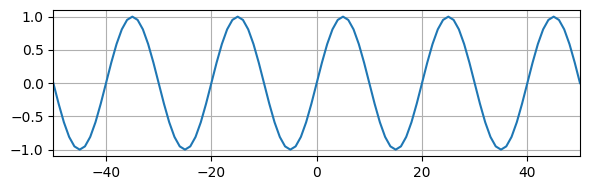

In [163]:
plt.figure(figsize=(6, 2))

x = np.arange(-50, 51, 1)
amplitude = 1.0
wavelength = 20.0
offset = 0
y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)

plt.plot(x, y)
plt.grid()
plt.xlim(np.min(x), np.max(x))


plt.tight_layout()
plt.show()

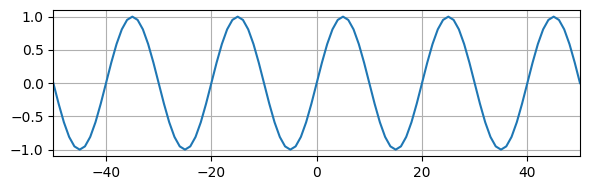

In [164]:
plt.figure(figsize=(6, 2))

x = np.arange(-50, 51, 1)
amplitude = 1.0
wavelength = 20.0
offset = 0
y = amplitude * np.sin((2 * np.pi * x / wavelength) + offset)

plt.plot(x, y)
plt.grid()
plt.xlim(np.min(x), np.max(x))


plt.tight_layout()
plt.show()

# 2D FFT

In [61]:
_input = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

_input, np.fft.ifftshift(_input), np.fft.fftshift(_input)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[5, 6, 4],
        [8, 9, 7],
        [2, 3, 1]]),
 array([[9, 7, 8],
        [3, 1, 2],
        [6, 4, 5]]))

In [68]:
_X, _Y = np.meshgrid(np.arange(3), np.arange(3))

_X, _Y, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]),
 array([[1, 2, 0],
        [1, 2, 0],
        [1, 2, 0]]),
 array([[2, 0, 1],
        [2, 0, 1],
        [2, 0, 1]]))

In [70]:
_X, _ = np.meshgrid(np.arange(-3, 4, 1), np.arange(-3, 4, 1))

_X, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3],
        [-3, -2, -1,  0,  1,  2,  3]]),
 array([[ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1],
        [ 0,  1,  2,  3, -3, -2, -1]]),
 array([[ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0],
        [ 1,  2,  3, -3, -2, -1,  0]]))

In [88]:
_X, _ = np.meshgrid(np.arange(0, 4, 1), np.arange(0, 4, 1))

_X, np.fft.ifftshift(_X), np.fft.fftshift(_X)

(array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]),
 array([[2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1]]),
 array([[2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1],
        [2, 3, 0, 1]]))

In [90]:
np.fft.fft2(_X), np.fft.fftshift( np.fft.fft2(_X) )

(array([[24.+0.j, -8.+8.j, -8.+0.j, -8.-8.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]),
 array([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [-8.+0.j, -8.-8.j, 24.+0.j, -8.+8.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]))

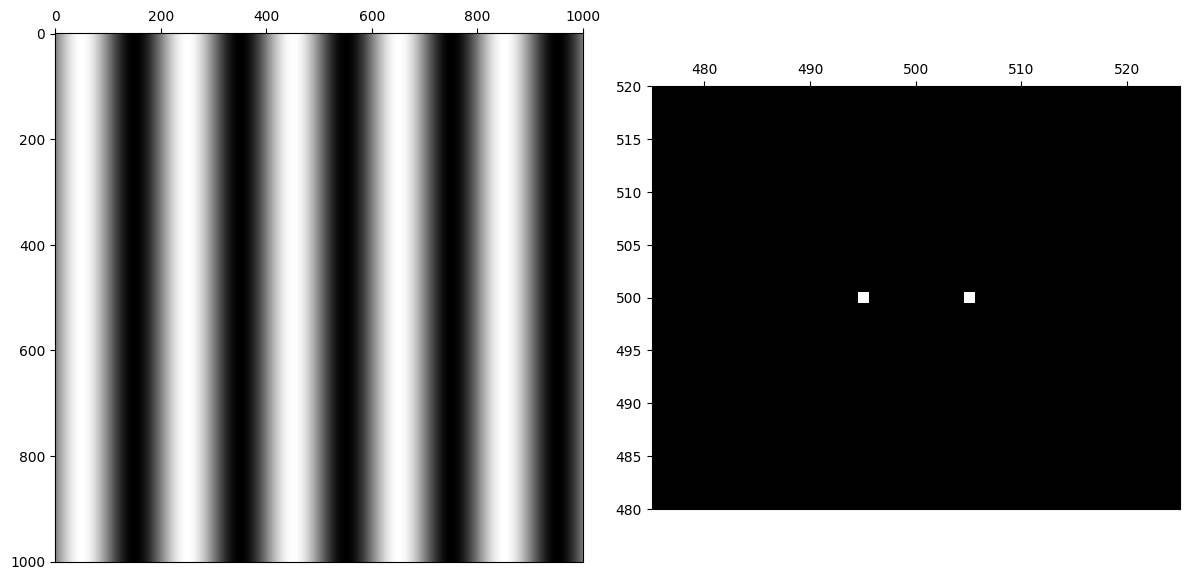

In [113]:
width = 1001
height = 1001
wavelength = 200
angle = np.deg2rad(0)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
grating = np.sin(
    (2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength)
    + 0
)

#ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 13))

ax1.imshow(grating, cmap='gray')
ax1.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

ax2.imshow(np.abs(ft), cmap='gray')
ax2.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.set_xlim([475, 525])
ax2.set_ylim([480, 520])
#ax2.set_xlim([-10, 8])
#ax2.set_ylim([-10, 8])

plt.tight_layout()
plt.show()

In [114]:
np.unravel_index(np.argmax(abs(ft)), ft.shape)

(np.int64(500), np.int64(495))

In [115]:
abs(ft[500, 495])

np.float64(500729.49154169904)

In [116]:
abs(ft[500, 505])

np.float64(500729.49154169904)

In [117]:
X.shape

(1001, 1001)

In [118]:
# This scaling happens because the FFT preserves the total energy in the signal, distributed across all frequencies.
abs(ft[500, 495]) / (width * height)  # Should be close to 0.5

np.float64(0.4997295327466729)

In [121]:
"""
With a wavelength of 200 pixels, your pattern repeats every 200 pixels.

In the frequency domain, we're measuring how many complete cycles fit within our image width.
"""
peak_distance = width / wavelength  # ≈ 5 pixels from center
center = width // 2  # 500

peak_distance, center

(5.005, 500)